In [3]:
from __future__ import division, print_function, absolute_import, unicode_literals

# Python imports
import numpy  # Matrix and vector computation package
import matplotlib.pyplot as plt  # Plotting library
import seaborn
# Allow matplotlib to plot inside this notebook
%matplotlib inline
# Set the seed of the numpy random number generator so that the tutorial is reproducable
numpy.random.seed(seed=1)

from matplotlib import animation, rc
from IPython.display import HTML, Image

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [42]:
# Define the vector of input samples as x, with 20 values sampled from a uniform distribution
# between 0 and 1
x = numpy.random.uniform(0, 1, 20)

# Generate the target values t from x with small gaussian noise so the estimation won't
# be perfect.
# Define a function f that represents the line that generates t without noise
def f(x): return x * 2

# Create the targets t with some gaussian noise
noise_variance = 0.2  # Variance of the gaussian noise
# Gaussian noise error for each sample in x
noise = numpy.random.randn(x.shape[0]) * noise_variance
# Create targets t
t = f(x) + noise

In [46]:
# f(x)
# t

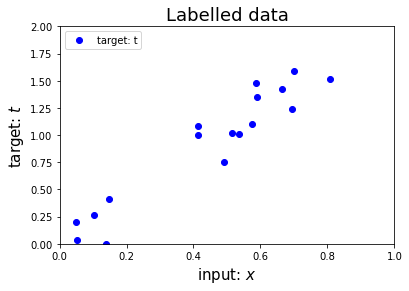

In [58]:
# Plot the target t versus the input x
plt.plot(x, t, 'bo', label='target: t')

plt.xlabel('input: $x$', fontsize=15)
plt.ylabel('target: $t$', fontsize=15)

plt.ylim([0,2])
plt.xlim([0,1])

plt.title('Labelled data', fontsize=18)
plt.legend(loc=2)

plt.show()

In [6]:
# Define the neural network function y = x * w
def nn(x, w): return x * w

# Define the cost function
def cost(y, t): return ((t - y)**2).sum()

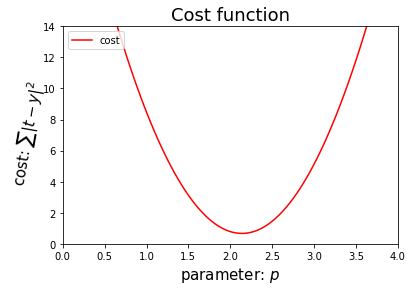

In [78]:

 # Plot the cost vs the given weight w

# Define a vector of weights for which we want to plot the cost
ws = numpy.linspace(0, 4, num=100)  # weight values
cost_ws = numpy.vectorize(lambda w: cost(nn(x, w) , t))(ws)  # cost for each weight in ws

# Plot
plt.plot(ws, cost_ws, 'r-', label='cost')

plt.ylim([0,14])
plt.xlim([0,4])

plt.xlabel('parameter: $p$', fontsize=15)
plt.ylabel('cost: $\sum |t-y|^2$', fontsize=15, rotation=80,) 

plt.title('Cost function', fontsize=18)
plt.legend(loc=2)
plt.show()

In [79]:
cost_ws.shape, min(cost_ws)

((100,), 0.6678072135072464)

i: 2
(1.5277226461294047, -3.2273834493709854, 1.1238638178477975)


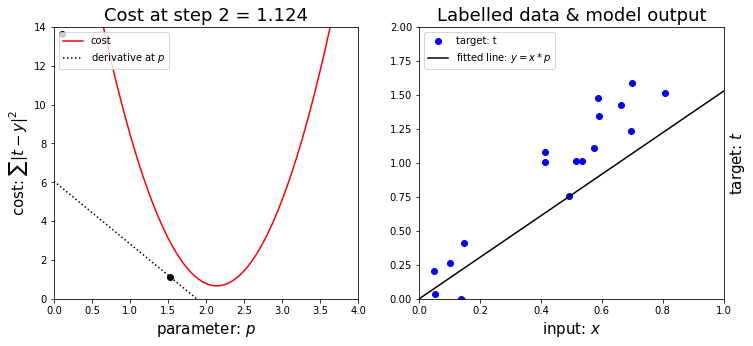

In [82]:
def init_fig():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    
    
    # Line vs data plot
    # Plot the fitted line agains the target line
    # Plot the target t versus the input x
    ax2.plot(x, t, 'bo', label='target: t')
    ax2.set_xlim([0, 1])
    ax2.set_ylim([0, 2])
    ax2.set_xlabel('input: $x$', fontsize=15)
    ax2.set_ylabel('target: $t$', fontsize=15)
    ax2.yaxis.set_label_position('right')
    ax2.set_title('Labelled data & model output', fontsize=18)
    line2, = ax2.plot([], [], 'k-', label='fitted line: $y=x*p$')
    ax2.legend(loc=2)
    
    
    # Cost function plot
    ax1.plot(ws, cost_ws, 'r-', label='cost')
    ax1.set_ylim([0, 14])
    ax1.set_xlim([0, 4])
    ax1.set_xlabel('parameter: $p$', fontsize=15)
    ax1.set_ylabel('cost: $\sum |t-y|^2$', fontsize=15)
    cost_text = ax1.set_title('Cost at step {}'.format(0), fontsize=18)
    line1, = ax1.plot([], [], 'k:', label='derivative at $p$')
    pc_dots, = ax1.plot([], [], 'ko')
    ax1.legend(loc=2)
    
    return fig, ax1, ax2, line1, line2, pc_dots, cost_text




def get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights):
    xs = numpy.linspace(0, 4, num=100)  # weight values
    #(w, dw, cost)
    def anim(i):
        print('i:', i)
        if i == 0:
            return [line1, line2, pc_dots, cost_text]
        (w, dw, cost) = weights[i-1]
        cost_text.set_text('Cost at step {} = {:.3f}'.format(i, cost))
        ws, _, cs = zip(*weights[0:i])
        pc_dots.set_xdata(ws)
        pc_dots.set_ydata(cs)
        print((w, dw, cost))
        
        abline_values = [dw * (x-w) + cost for x in xs]
        line1.set_xdata(xs)
        line1.set_ydata(abline_values)
        # Plot fit
        # plot the fitted line
        line2.set_xdata([0, 1])
        line2.set_ydata([0*w, 1*w])
        ax2.legend(loc=2)
        return [line1, line2, pc_dots, cost_text]
    return anim

fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig()
weights = [(0.1, -14.277226461294045, 13.619727808406639), 
           (1.5277226461294047, -3.2273834493709854, 1.1238638178477975), 
           (1.8504609910665033, -0.72955373773133259, 0.48533613845506723), 
           (1.9234163648396365, -0.16491646083811171, 0.45270793462228587), 
           (1.9399080109234477, -0.037279555499150921, 0.45104066205179061)]
anim = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
anim(2)
plt.show()

In [81]:
len(weights)

5

In [38]:
# define the gradient function. Remember that y = nn(x, w) = x * w
def gradient(w, x, t): 
    return 2 * x * (nn(x, w) - t)

# define the update function delta w
def delta_w(w_k, x, t, learning_rate):
    return learning_rate * gradient(w_k, x, t).sum()

# Set the initial weight parameter
w = 0.3
# Set the learning rate
learning_rate = 0.05

# Start performing the gradient descent updates, and print the weights and cost:
nb_of_iterations = 11  # number of gradient descent updates
w_cost = [(w, cost(nn(x, w), t))] # List to store the weight,costs values
weights = [(w, gradient(w, x, t).sum(), cost(nn(x, w), t))]
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # Get the delta w update
    w = w - dw  # Update the current weight parameter
    gw = gradient(w, x, t).sum()
    c = cost(nn(x, w), t)
    w_cost.append((w, c))  # Add weight,cost to list
    weights.append((w, gw, c))

# Print the final w, and cost
for i in range(0, len(w_cost)):
    print('w({}): {:.4f} \t cost: {:.4f}'.format(i, w_cost[i][0], w_cost[i][1]))
    
print(weights)

w(0): 0.3000 	 cost: 10.9191
w(1): 0.9365 	 cost: 4.3849
w(2): 1.3266 	 cost: 1.9293
w(3): 1.5658 	 cost: 1.0065
w(4): 1.7124 	 cost: 0.6597
w(5): 1.8023 	 cost: 0.5294
w(6): 1.8574 	 cost: 0.4804
w(7): 1.8912 	 cost: 0.4620
w(8): 1.9119 	 cost: 0.4551
w(9): 1.9246 	 cost: 0.4525
w(10): 1.9324 	 cost: 0.4515
w(11): 1.9372 	 cost: 0.4512
[(0.3, -12.729328759751033, 10.919072286302129), (0.9364664379875516, -7.80340407740004, 4.3848746207963405), (1.3266366418575535, -4.783686268495318, 1.929320817602278), (1.5658209552823195, -2.9325220235186262, 1.0065228263183572), (1.7124470564582508, -1.7977109985364408, 0.6597350134795686), (1.8023326063850729, -1.102042817868153, 0.5294120302596047), (1.8574347472784805, -0.6755804316731288, 0.48043660688379436), (1.8912137688621369, -0.41414808232456113, 0.4620316253864674), (1.911921172978365, -0.2538833661424025, 0.4551150268035902), (1.9246153412854852, -0.15563699641444467, 0.4525157665998454), (1.9323971911062074, -0.09540945915820041, 0.451

i: 0


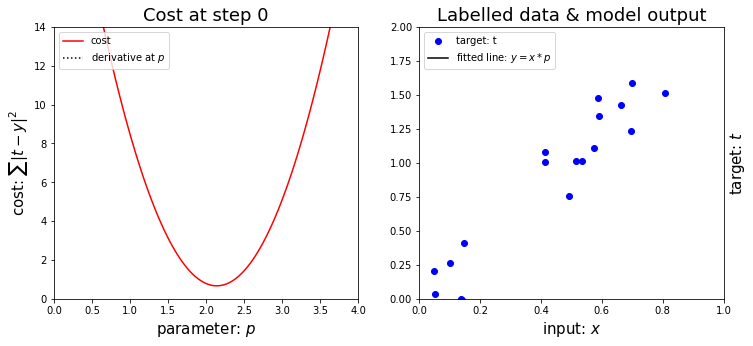

In [83]:
fig, ax1, ax2, line1, line2, pc_dots, cost_text = init_fig()
animate = get_anim(fig, ax1, ax2, line1, line2, pc_dots, cost_text, weights)
# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, frames=len(weights)+1, interval=800, blit=True)

In [85]:
HTML(anim.to_jshtml())

i: 0
i: 0
i: 1
(0.1, -14.277226461294045, 13.619727808406639)
i: 2
(1.5277226461294047, -3.2273834493709854, 1.1238638178477975)
i: 3
(1.8504609910665033, -0.7295537377313326, 0.48533613845506723)
i: 4
(1.9234163648396365, -0.1649164608381117, 0.45270793462228587)
i: 5
(1.9399080109234477, -0.03727955549915092, 0.4510406620517906)


In [25]:
gif_path = './gradient_descent.gif'
anim.save('./gradient_descent.gif', writer='imagemagick', fps=1000/800)
Image(url=gif_path)

AttributeError: 'function' object has no attribute 'save'

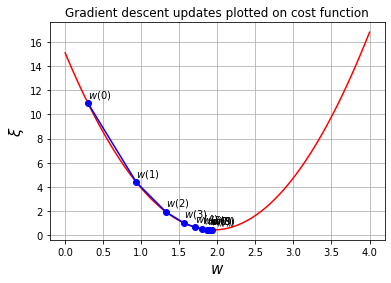

In [26]:
# Plot the first 2 gradient descent updates
plt.plot(ws, cost_ws, 'r-')  # Plot the error curve
# Plot the updates
for i in range(0, len(w_cost)-2):
    w1, c1 = w_cost[i]
    w2, c2 = w_cost[i+1]
    plt.plot(w1, c1, 'bo')
    plt.plot([w1, w2],[c1, c2], 'b-')
    plt.text(w1, c1+0.5, '$w({})$'.format(i)) 
# Show figure
plt.xlabel('$w$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Gradient descent updates plotted on cost function')
plt.grid()
plt.show()

In [14]:
w = 0
# Start performing the gradient descent updates
nb_of_iterations = 10  # number of gradient descent updates
for i in range(nb_of_iterations):
    dw = delta_w(w, x, t, learning_rate)  # get the delta w update
    w = w - dw  # update the current weight parameter

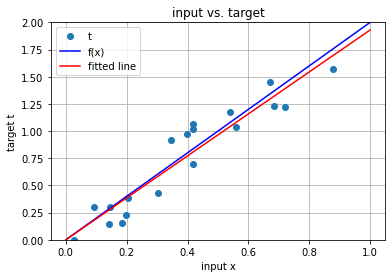

In [28]:
# Plot the fitted line agains the target line
# Plot the target t versus the input x
plt.plot(x, t, 'o', label='t')
# Plot the initial line
plt.plot([0, 1], [f(0), f(1)], 'b-', label='f(x)')
# plot the fitted line
plt.plot([0, 1], [0*w, 1*w], 'r-', label='fitted line')
plt.xlabel('input x')
plt.ylabel('target t')
plt.ylim([0,2])
plt.title('input vs. target')
plt.grid()
plt.legend(loc=2)
plt.show()

In [41]:
from IPython.display import HTML
HTML(anim.to_jshtml())

i: 0
i: 0
i: 1
(0.3, -12.729328759751033, 10.919072286302129)
i: 2
(0.9364664379875516, -7.80340407740004, 4.3848746207963405)
i: 3
(1.3266366418575535, -4.783686268495318, 1.929320817602278)
i: 4
(1.5658209552823195, -2.9325220235186262, 1.0065228263183572)
i: 5
(1.7124470564582508, -1.7977109985364408, 0.6597350134795686)
i: 6
(1.8023326063850729, -1.102042817868153, 0.5294120302596047)
i: 7
(1.8574347472784805, -0.6755804316731288, 0.48043660688379436)
i: 8
(1.8912137688621369, -0.41414808232456113, 0.4620316253864674)
i: 9
(1.911921172978365, -0.2538833661424025, 0.4551150268035902)
i: 10
(1.9246153412854852, -0.15563699641444467, 0.4525157665998454)
i: 11
(1.9323971911062074, -0.09540945915820041, 0.4515389636921999)
i: 12
(1.9371676640641176, -0.058488438524089685, 0.4511718808126135)
